## Bayesian Logistic Ridge Regression
Script Name: Model_Analysis.ipynb

Author: Brian Cain


This notebook takes the cleaned and feature engineering data from modelData.csv and uses it to create a Bayesian Logistic Ridge Regression model. It then analyzes the results of this model using posterior predictive distributions and comparing its performance to frequentist bayesian logistic regression. 

<hr>

In [1]:
##Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Pull in and display the data
data = pd.read_csv('D:\\College_Football_Model_Data\\modelData.csv')
data.head()

,gameId,school,week_num,gameSeason,win,offDiff_rush_td_movAvg,defDiff_pass_td_movAvg,offDiff_yp_rush_movAvg,defDiff_pass_yards_movAvg,offDiff_total_yards_movAvg,defDiff_turnovers_movAvg,defDiff_firstDowns_movAvg,defDiff_offensive_ppa_movAvg,offDiff_offensive_powerSuccess_movAvg,defDiff_completion_pct_movAvg,defDiff_third_pct_movAvg,gameDiff_gameControl_movAvg,gameDiff_elo_movAvg
0,400764869,Temple,3,2015.0,1.0,-1.333333,-0.333333,-0.433333,-13.833333,-151.000000,0.666667,1.000000,-0.047219,-0.089744,-0.034619,0.046491,6.750000,324.833333
1,400763604,UTEP,3,2015.0,1.0,-1.333333,1.333333,-1.133333,57.333333,-190.000000,-0.666667,4.333333,0.346266,0.111111,0.055580,0.150253,-2.833333,225.666667
2,400756922,Georgia Tech,3,2015.0,0.0,2.500000,-1.333333,2.566667,-44.500000,148.666667,1.333333,-4.833333,-0.166122,0.444444,-0.098090,0.070130,1.708333,172.333333
3,400603852,South Carolina,3,2015.0,0.0,0.666667,-0.666667,2.233333,30.333333,53.333333,1.000000,0.333333,-0.097716,-0.022222,0.034252,-0.064306,-9.833333,-240.333333
4,400603853,Kentucky,3,2015.0,0.0,1.333333,-1.666667,3.300000,-45.000000,100.333333,0.666667,1.333333,-0.124125,-0.111111,-0.050671,-0.135313,-4.500000,-290.333333


In [2]:
##Perform z-score normalization of the data
def z_score_normalization(df,col):
    
    ##Compute variables necessary for this 
    mu = np.mean(df[col])
    std = np.std(df[col])
    
    ##Replace column with normalized column
    df[col] = (df[col]-mu)/std
    
    return df

##Now perform normalization
predictors = ['offDiff_rush_td_movAvg', 'defDiff_pass_td_movAvg',
       'offDiff_yp_rush_movAvg', 'defDiff_pass_yards_movAvg',
       'offDiff_total_yards_movAvg', 'defDiff_turnovers_movAvg',
       'defDiff_firstDowns_movAvg', 'defDiff_offensive_ppa_movAvg',
       'offDiff_offensive_powerSuccess_movAvg',
       'defDiff_completion_pct_movAvg', 'defDiff_third_pct_movAvg',
       'gameDiff_gameControl_movAvg', 'gameDiff_elo_movAvg']
for i in predictors:
    data = z_score_normalization(data,i)
data.head()

,gameId,school,week_num,gameSeason,win,offDiff_rush_td_movAvg,defDiff_pass_td_movAvg,offDiff_yp_rush_movAvg,defDiff_pass_yards_movAvg,offDiff_total_yards_movAvg,defDiff_turnovers_movAvg,defDiff_firstDowns_movAvg,defDiff_offensive_ppa_movAvg,offDiff_offensive_powerSuccess_movAvg,defDiff_completion_pct_movAvg,defDiff_third_pct_movAvg,gameDiff_gameControl_movAvg,gameDiff_elo_movAvg
0,400764869,Temple,3,2015.0,1.0,-1.371113,-0.399361,-0.374039,-0.262128,-1.743327,0.938524,0.203776,-0.354374,-0.651392,-0.444200,0.500301,1.375274,1.300499
1,400763604,UTEP,3,2015.0,1.0,-1.371113,1.441503,-0.947174,0.798175,-2.181374,-0.964484,1.017180,2.496855,0.710578,0.710779,1.656307,-0.440968,0.947893
2,400756922,Georgia Tech,3,2015.0,0.0,2.502526,-1.503880,2.082252,-0.719026,1.622522,1.890027,-1.219681,-1.215956,2.970868,-1.256929,0.763657,0.419773,0.758256
3,400603852,South Carolina,3,2015.0,0.0,0.649916,-0.767534,1.809331,0.395906,0.551740,1.414276,0.041095,-0.720285,-0.193538,0.437671,-0.734100,-1.767614,-0.709059
4,400603853,Kentucky,3,2015.0,0.0,1.323592,-1.872053,2.682679,-0.726476,1.079643,0.938524,0.285116,-0.911648,-0.796282,-0.649748,-1.525188,-0.756836,-0.886843


### Defining the Log-Posterior

In [4]:
##Define function to compute log-likelihood
def logLike(y,x,betas):
    
    ##Compute eta
    eta = np.matmul(x,betas)
    
    ##Compute sum 1 (sum(y_i * eta_i))
    sum1 = sum(y*eta)
    
    ##Compute sum 2 (sum(ln(1+e^(eta_i))))
    sum2 = sum(np.log((1+np.exp(eta))))
    
    ##Compute the final likelihood
    computed_logLike = sum1 - sum2
    
    return computed_logLike

##Define function to compute log prior for betas
def beta_logPrior(betas,lambda_):
    
    computed_betaPrior = sum(np.log((lambda_**(.5))*np.exp(((betas*betas)*-lambda_))))
    
    return computed_betaPrior

##Define function to compute log prior of lambda (shrinkage parameter)
def lambda_logPrior(lambda_):
    
    computed_lambdaPrior = np.log(np.exp(-1.5*lambda_))
    
    return computed_lambdaPrior

##Define function that computes the log posterior
def logPosterior(y,x,betas,lambda_):
    
    ##Add up log likelihood, and the priors
    computed_logPost = logLike(y,x,betas) + beta_logPrior(betas,lambda_) + lambda_logPrior(lambda_)
    
    return computed_logPost

### Metropolis-Hastings Algorithm

<b>Proposal Distribution:</b>

Frequentist comparison: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [5]:
##Import necessary distributions
from scipy.stats import multivariate_normal
from scipy.stats import uniform
from scipy.stats import multivariate_t

##Define function the generates new sample from the proposal distribution 
def generateProposal(beta,lambda_,cov):
    
    ##Draw sample from multivarate normal and uniform
    beta_star = multivariate_normal(beta,cov).rvs()
    lambda_star = uniform(0,2).rvs()
    
    return beta_star, lambda_star

##Define function that gives the log probability of acceptance
def log_acceptProb(beta_star,beta,lambda_star,lambda_,cov,y,x):
    
    ##Compute proposal distribution probabilities
    prop_star_t = multivariate_normal(beta,cov).pdf(beta_star) ##J_t(theta*|theta^(t-1))
    prop_t = multivariate_normal(beta_star,cov).pdf(beta) ##J_t(theta^(t-1)|theta*))
    prop_star_exp =  uniform(0,2).pdf(lambda_star)
    prop_exp = uniform(0,2).pdf(lambda_)
    
    ##Compute log posterior probabilities
    post_star = logPosterior(y,x,beta_star,lambda_star)
    post = logPosterior(y,x,beta,lambda_)
    
    ##Compute the acceptance probability
    p = post_star + np.log((prop_t*prop_exp)) - post - np.log((prop_star_t*prop_star_exp))
    
    return np.min([np.log(1),p])

In [5]:
##Set random seed to replicated results
np.random.seed(1)

##Split the data and prepare it to be used in the model
x = data[predictors]
y = data['win']

##Perform the train/test split on the data
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, 
                                                  random_state = 0, ##random seed set for reproducible results
                                                  test_size = .2)

##Create the input data for likelihood
x = train_x.to_numpy()
y = train_y.to_numpy()
i = np.ones((len(y),1))
x = np.hstack((i,x))

In [7]:
##Define the coded process for the metropolis-hastings algorithm

##Define column names for the dataset we'll use to store sampling
colNames = []
for i in range(14):
    colNames.append('beta_'+str(i))
colNames.append('lambda')

##Create storage location for sampling algorithm
np.random.seed(2)
matrixSize = 14
cov = np.random.rand(matrixSize, matrixSize)
cov = np.dot(cov, cov.transpose())*.00016

##Initial Values
beta1 = np.array([-0.34898289,-0.07019993,  0.03887642,  0.08730674, -0.01601029, -0.01449917,
        -0.01014086, -0.00564236, -0.11190569, -0.06597375,  0.1661603 ,
         0.03983892,  2.36169154, -0.10165575])
beta2 = np.ones(14)*-5
beta3 = np.ones(14)*5
beta_inits = [beta1,beta2,beta3]
lambda_= 1

##Run three chains to visualize convergence
print('Acceptance Rates:')
print('-----------------')
for j in range(3):
    
    ##Determine which initial value we are currently iterating through
    mh_samps = []
    accept = 0
    beta = beta_inits[j]
    
    ##Perform metropolis-hastings for initial value
    for i in range(150000):

        ##Draw sample from proposal
        beta_star,lambda_star = generateProposal(beta,lambda_,cov)

        ##Compute the acceptance probability
        p = log_acceptProb(beta_star,beta,lambda_star,lambda_,cov,y,x)

        ##Determine if we will accept the sample
        if np.log(np.random.uniform(0,1)) < p:
            beta = beta_star
            lambda_ = lambda_star
            accept += 1

        mh_samps.append(np.append(beta,lambda_))
        
    ###Save the metropolis-hastings result to be used later
    mh_df = pd.DataFrame(mh_samps,columns=colNames)
    mh_df.to_csv('D:\College_Football_Model_Data\\mh_posteriors\\beta'+str(j)+'.csv', index = False)
    
    ##Display acceptance rate of the algorithm
    print('Beta '+str(j)+' Initial Value Acceptance Rate: '+str(accept/150000))

Acceptance Rates:
-----------------
Beta 0 Initial Value Acceptance Rate: 0.24476666666666666
Beta 1 Initial Value Acceptance Rate: 0.24678666666666665
Beta 2 Initial Value Acceptance Rate: 0.24643333333333334


#### Metropolis-Hastings Convergence Analysis

It has been cited that as the dimensionality of the parameters increases an ideal Metropolis-Hastings acceptance rate is approxiamatley $.22$, for lower dimension problems it is around $.44$. Our problem is a hierarchial model with 15 total parameters thus it is ideal to be closer to $.22$, which the results above display that we are. 

I have saved the Metropolis-Hastings results at the 3 different initial $\vec{\beta}$ in separate dataframes. Below I visualize the convergence of the Metropolis-Hastings algorithm. 

In [3]:
##Import the necessary datasets
beta0 = pd.read_csv('D:\College_Football_Model_Data\\mh_posteriors\\beta0.csv')
beta1 = pd.read_csv('D:\College_Football_Model_Data\\mh_posteriors\\beta1.csv')
beta2 = pd.read_csv('D:\College_Football_Model_Data\\mh_posteriors\\beta2.csv')

Text(0.5, 0.98, 'Metropolis-Hastings Trace Plots')

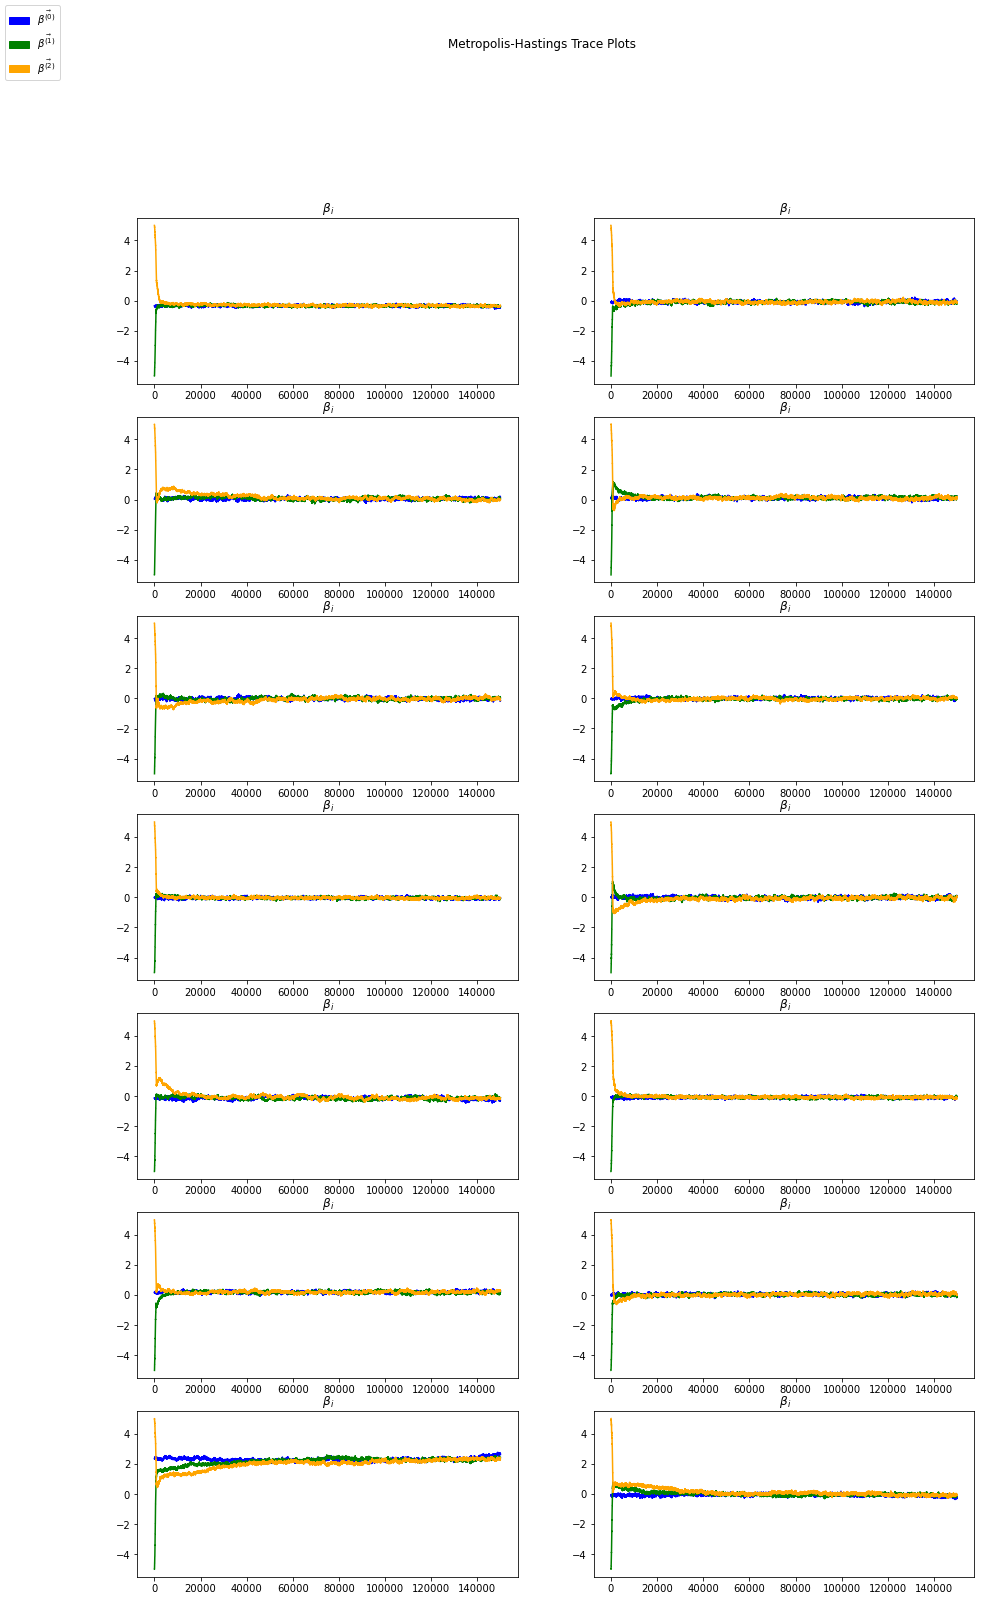

In [9]:
##Create subplot 
import matplotlib.patches as mpatches
fig, ax = plt.subplots(7, 2,figsize=(15,25))
row,col = 0,0

##Iterate through parameters and plot convergence results
for i in range(14):
    
    ax[row,col].plot(beta0['beta_'+str(i)],color='blue')
    ax[row,col].plot(beta1['beta_'+str(i)],color='green')
    ax[row,col].plot(beta2['beta_'+str(i)],color='orange')
    ax[row,col].set_title(r' $\beta_{i}$ ')
    
    if col == 1:
        row+=1
        col = 0
    else:
        col+=1
  
fig.legend(handles=[mpatches.Patch(color='blue', label=r'$ \vec{\beta^{(0)}}$ '),
                    mpatches.Patch(color='green', label=r'$ \vec{\beta^{(1)}}$ '),
                    mpatches.Patch(color='orange', label=r'$ \vec{\beta^{(2)}}$ ')],loc='upper left')
fig.suptitle('Metropolis-Hastings Trace Plots')

Text(0.5, 0.98, 'Metropolis-Hastings Trace Plots')

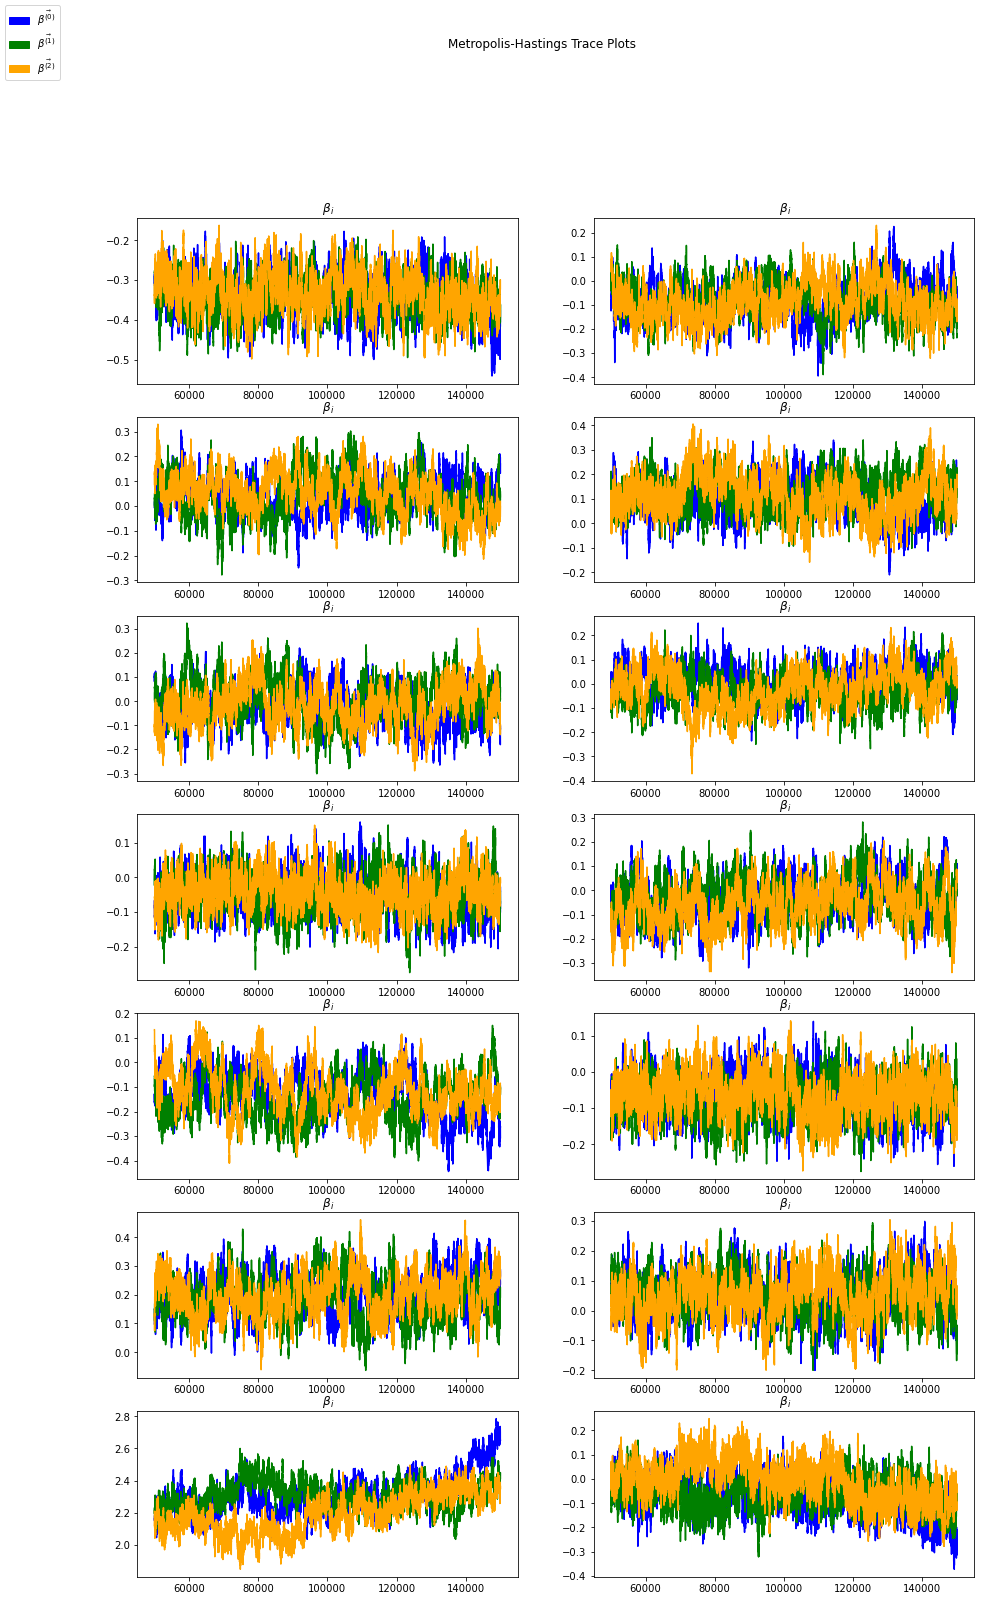

In [18]:
##Create subplot 
import matplotlib.patches as mpatches
fig, ax = plt.subplots(7, 2,figsize=(15,25))
row,col = 0,0

##Iterate through parameters and plot convergence results
for i in range(14):
    
    ax[row,col].plot(beta0['beta_'+str(i)][50000:],color='blue')
    ax[row,col].plot(beta1['beta_'+str(i)][50000:],color='green')
    ax[row,col].plot(beta2['beta_'+str(i)][50000:],color='orange')
    ax[row,col].set_title(r' $\beta_{i}$ ')
    
    if col == 1:
        row+=1
        col = 0
    else:
        col+=1
  
fig.legend(handles=[mpatches.Patch(color='blue', label=r'$ \vec{\beta^{(0)}}$ '),
                    mpatches.Patch(color='green', label=r'$ \vec{\beta^{(1)}}$ '),
                    mpatches.Patch(color='orange', label=r'$ \vec{\beta^{(2)}}$ ')],loc='upper left')
fig.suptitle('Metropolis-Hastings Trace Plots')

Text(0.5, 0.98, 'Metropolis-Hastings Posterior Distribution Plots')

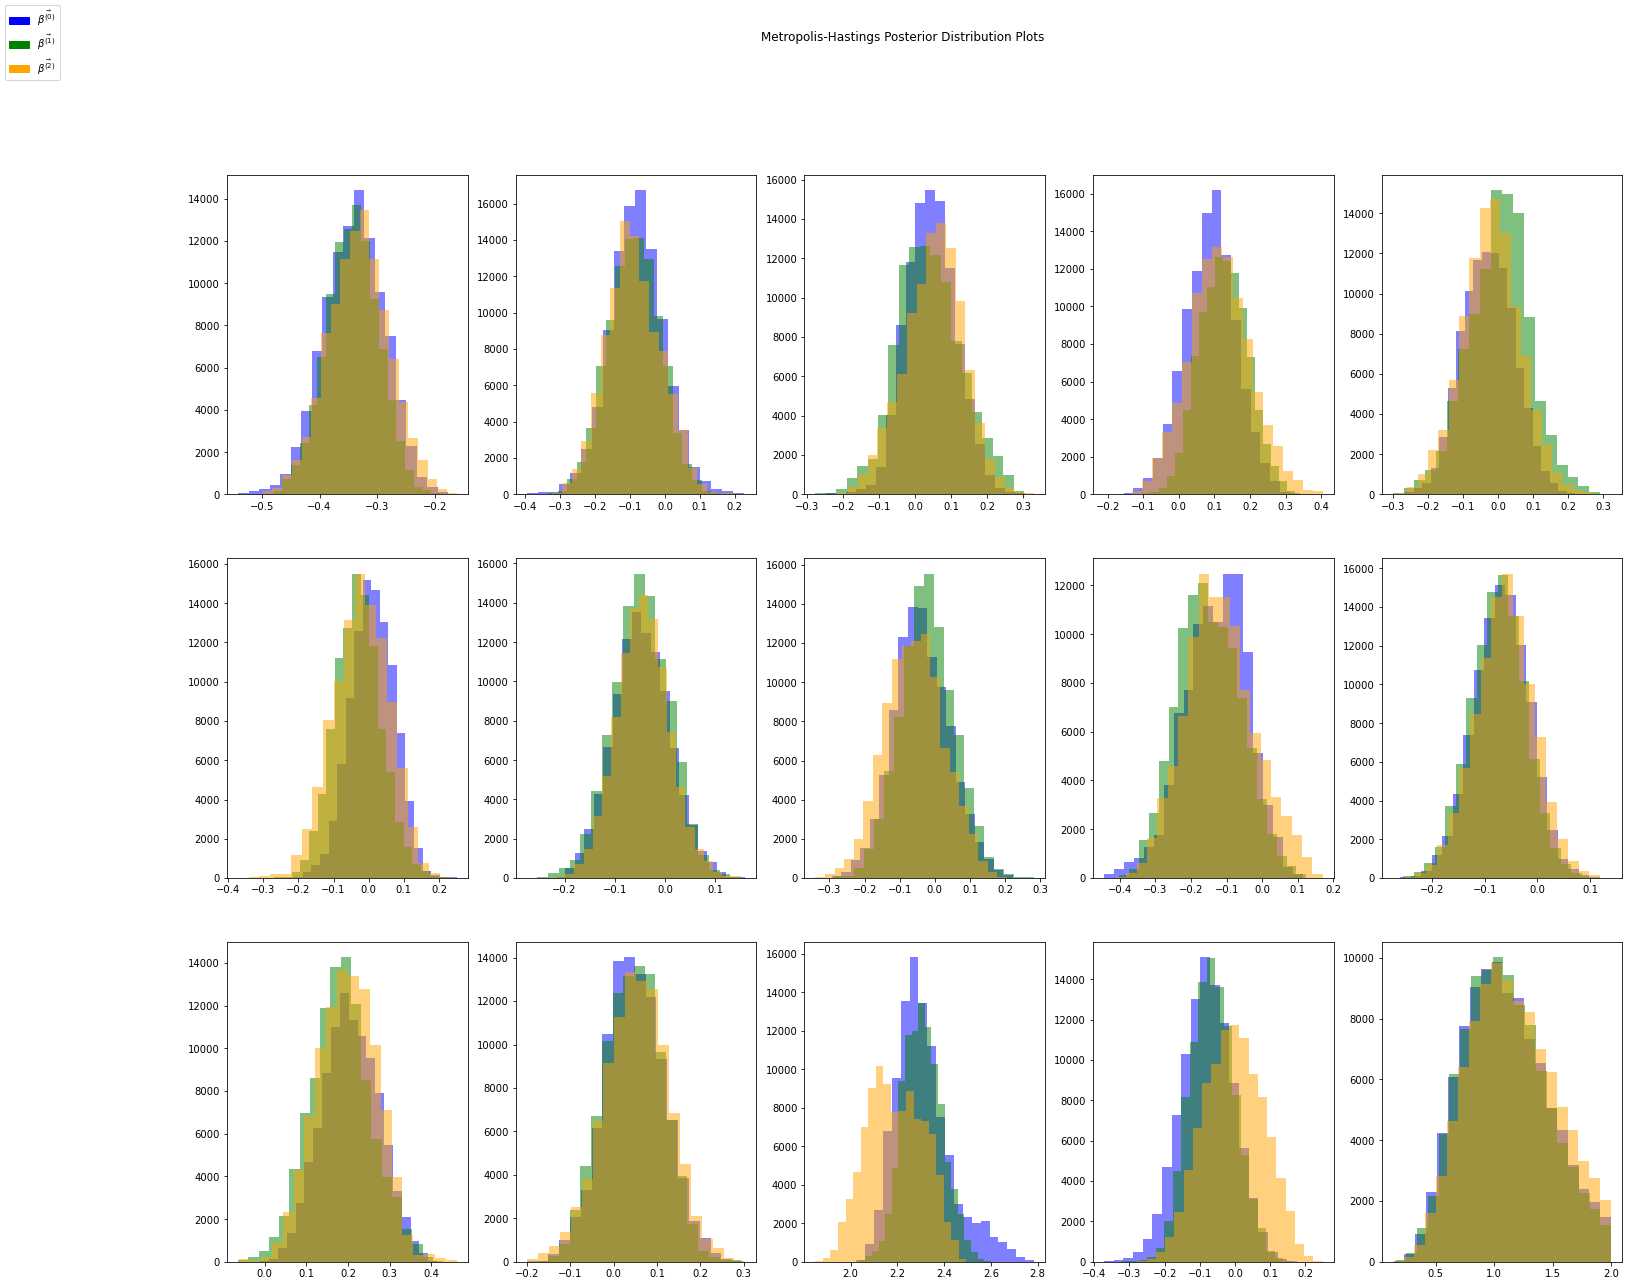

In [95]:
##Create figure showing distributions
fig, ax = plt.subplots(3, 5,figsize=(25,20))
row,col = 0,0
for i in range(14):
    
    ax[row,col].hist(beta0['beta_'+str(i)][50000:],alpha=.5,color='blue',bins=20)
    ax[row,col].hist(beta1['beta_'+str(i)][50000:],alpha=.5,color='green',bins=20)
    ax[row,col].hist(beta2['beta_'+str(i)][50000:],alpha=.5,color='orange',bins=20)
    
    if col == 4:
        row+=1
        col = 0
    else:
        col+=1
        
ax[2,4].hist(beta0['lambda'][50000:],alpha=.5,color='blue',bins=20)
ax[2,4].hist(beta1['lambda'][50000:],alpha=.5,color='green',bins=20)
ax[2,4].hist(beta2['lambda'][50000:],alpha=.5,color='orange',bins=20)

fig.legend(handles=[mpatches.Patch(color='blue', label=r'$ \vec{\beta^{(0)}}$ '),
                    mpatches.Patch(color='green', label=r'$ \vec{\beta^{(1)}}$ '),
                    mpatches.Patch(color='orange', label=r'$ \vec{\beta^{(2)}}$ ')],loc='upper left')
fig.suptitle('Metropolis-Hastings Posterior Distribution Plots')

In [6]:
##Fit frequentist logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2',random_state=0).fit(train_x.to_numpy(), train_y.to_numpy())

In [7]:
##Iterate through parameters and compare to estimates of frequentist
for i in range(14):
    if i == 0:
        print('-----------------')
        print('Beta_'+str(i)+ ' (Intercept)')
        print('-----------------')
        print('Posterior Average: '+str(np.mean(beta0['beta_'+str(i)][50000:])/2+np.mean(beta1['beta_'+str(i)][50000:])/2))
        print('Frequentist Estimate: '+str(clf.intercept_[0]))
        print('\n')
    else:
        print('-----------------')
        print('Beta_'+str(i))
        print('-----------------')
        print('Posterior Average: '+str(np.mean(beta0['beta_'+str(i)][50000:])/2+np.mean(beta1['beta_'+str(i)][50000:])/2))
        print('Frequentist Estimate: '+str(clf.coef_[0][i-1]))
        print('\n')

-----------------
Beta_0 (Intercept)
-----------------
Posterior Average: -0.3418176347861388
Frequentist Estimate: -0.3469970154266858


-----------------
Beta_1
-----------------
Posterior Average: -0.08397868913052445
Frequentist Estimate: -0.082631782452524


-----------------
Beta_2
-----------------
Posterior Average: 0.04155752522103462
Frequentist Estimate: 0.018808076146738125


-----------------
Beta_3
-----------------
Posterior Average: 0.10765462088863895
Frequentist Estimate: 0.10585622925080641


-----------------
Beta_4
-----------------
Posterior Average: -0.011239181958350646
Frequentist Estimate: -0.002885779105992155


-----------------
Beta_5
-----------------
Posterior Average: -0.009915739819784462
Frequentist Estimate: -0.002982079949316843


-----------------
Beta_6
-----------------
Posterior Average: -0.04725851822188507
Frequentist Estimate: -0.044990020914881065


-----------------
Beta_7
-----------------
Posterior Average: -0.029841854191043432
Frequentis

Most the Bayesian posterior distribution means for the parameters are extremely similar. One thing to note is that for the bayesian model the shrinkage parameter $\lambda$ is treated as unknown, so as a result of this the bayesian coefficients will have noticeable variations from the logistic regression using a constant $\lambda$ parameter. We will also explore the $\lambda$ parameter marginal posterior distribution. 

(array([4.000e+00, 2.600e+01, 8.400e+01, 1.720e+02, 2.990e+02, 4.800e+02,
        8.540e+02, 1.128e+03, 1.649e+03, 2.069e+03, 2.673e+03, 3.533e+03,
        4.016e+03, 4.593e+03, 5.283e+03, 5.784e+03, 6.512e+03, 6.417e+03,
        7.682e+03, 7.478e+03, 7.704e+03, 7.431e+03, 8.103e+03, 7.911e+03,
        8.041e+03, 7.883e+03, 6.912e+03, 7.188e+03, 6.802e+03, 6.812e+03,
        6.346e+03, 6.169e+03, 5.744e+03, 5.224e+03, 4.919e+03, 4.392e+03,
        3.907e+03, 3.682e+03, 3.347e+03, 3.212e+03, 2.831e+03, 2.462e+03,
        2.054e+03, 1.882e+03, 1.863e+03, 1.628e+03, 1.433e+03, 1.270e+03,
        1.143e+03, 9.690e+02]),
 array([0.13936891, 0.17658152, 0.21379412, 0.25100672, 0.28821932,
        0.32543192, 0.36264452, 0.39985713, 0.43706973, 0.47428233,
        0.51149493, 0.54870753, 0.58592014, 0.62313274, 0.66034534,
        0.69755794, 0.73477054, 0.77198315, 0.80919575, 0.84640835,
        0.88362095, 0.92083355, 0.95804616, 0.99525876, 1.03247136,
        1.06968396, 1.10689656, 1.14

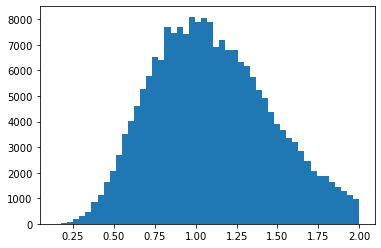

In [8]:
##Display descriptive statistics for the lambda posterior distributions using the two desired chains

##Vertically stack the dataframes since we'll be using those two chains
finalPosterior = beta0[50000:].append(beta1[50000:], ignore_index=True)
plt.hist(finalPosterior['lambda'],bins=50)

### Posterior Predictive Distributions and Model Performance Analysis

In terms of metrics, our main concern is the accuracy of the model. Since the dataset is a binary classification with an relatively even class balance.

In [9]:
##Performance of frequentist regression model
from sklearn.metrics import accuracy_score
y_pred = clf.predict(test_x)
accuracy_score(test_y, y_pred)

C:\Users\btcai\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.8028909329829172

In [10]:
##Assess accuracy of bayesian logistic regression
x = test_x.to_numpy()
i = np.ones((len(x),1))
x = np.hstack((i,x))

In [11]:
##Assemble average betas
postBeta_hat = np.array([np.mean(finalPosterior['beta_'+str(i)]) for i in range(14)])
y_postPred = []
for i in range(len(x)):
    
    winProb = np.exp(np.matmul(x[i],postBeta_hat))/(1+np.exp(np.matmul(x[i],postBeta_hat)))
    if winProb > .5:
        y_postPred.append(1)
    else:
        y_postPred.append(0)

In [12]:
accuracy_score(test_y,y_postPred)

0.8028909329829172

Now lets create the posterior predictive distribution for a couple of games. 

In [13]:
##Create distribution over p
def p_dist(finalPosterior_np,x_data_np):
    
    ##Storage location for p
    p_vals = []
    
    ##Iterate through the posterior distribution 
    for i in finalPosterior_np:
        
        betas = i[:-1] ##Exclude lambda shrinkage parameter
        p_vals.append(np.exp(np.matmul(x_data_np,betas))/(1+np.exp(np.matmul(x_data_np,betas))))
    
    return p_vals

In [45]:
##Define function to draw samples from posterior predictive distribution 
def posterior_predictive(p_vals):
    
    ##Storage location for posterior predictive distribution
    postPred = []
    
    ##Iterate through distribution of p-values
    for i in p_vals:
        
        ##Generate sample from binomial distribution
        postPred.append(np.random.binomial(1,i))
        
    return np.array(postPred)

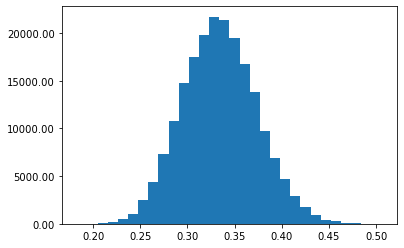

In [31]:
from matplotlib.ticker import FormatStrFormatter
ps = p_dist(finalPosterior.to_numpy(),x_dat)
fig, ax = plt.subplots()
plt.hist(ps,bins=30)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

In [32]:
postPred = np.array(posterior_predictive(ps))

(array([133364.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  66636.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

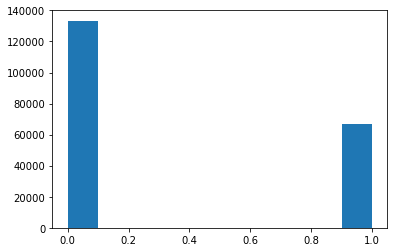

In [33]:
plt.hist(postPred)

In [48]:
##Define function that will give the moneyline winnings for event outcome
def moneyLine(wager,odds):
    
    ##Betting on the favorite
    if odds < 0:
        winnings = wager/(-1*odds/100)
    else:
        winnings = wager * (odds/100)
        
    return winnings

##Define function that will assemble sampled distribution of winnings from bets and posterior predictive distribution 
def posterior_winnings(postPred_list,wagerList,oddsList,betList,samp_num):
    
    ##Storage location for winnings
    winnings_dist = []
    
    ##Iterate through the number of samples we'd like to collect
    for i in range(samp_num):
        
        ##Initiate winnings for the current run
        winnings = 0
        
        ##Iterate through each game that is being bet on
        for j in range(len(postPred_list)):
            
            ##Assign variables for current game
            postPred = postPred_list[j]
            wager = wagerList[j]
            odds = oddsList[j]
            bet = betList[j]
            
            ##Sample from posterior predictive distribution 
            postSamp = np.random.binomial(1,len(postPred[postPred==1])/len(postPred))
            
            ##Determine winnings of bet
            if np.abs(postSamp - bet) < .00001: ##Avoid weird roundoff error
                winnings += moneyLine(wager,odds)
            else:
                winnings += -wager
                
        ##Add winnings to distribution of winnings
        winnings_dist.append(winnings)
    
    return winnings_dist

In [51]:
postPred_list = [posterior_predictive(p_dist(finalPosterior.to_numpy(),x[30])),
                 posterior_predictive(p_dist(finalPosterior.to_numpy(),x[40])),
                 posterior_predictive(p_dist(finalPosterior.to_numpy(),x[50])),
                 posterior_predictive(p_dist(finalPosterior.to_numpy(),x[60]))]

In [52]:
wagerList = [10,10,10,10]
oddsList = [-220,110,250,-300]
betList = [1,0,0,1]
samp_num = 100000
winDist = posterior_winnings(postPred_list,wagerList,oddsList,betList,samp_num)

(array([  906.,     0.,     0.,  1903.,     0.,  3980.,   151.,     0.,
        13139.,     0.,     0., 10596.,     0., 21631.,   734.,     0.,
        43892.,     0.,     0.,  3068.]),
 array([-40.        , -35.80606061, -31.61212121, -27.41818182,
        -23.22424242, -19.03030303, -14.83636364, -10.64242424,
         -6.44848485,  -2.25454545,   1.93939394,   6.13333333,
         10.32727273,  14.52121212,  18.71515152,  22.90909091,
         27.1030303 ,  31.2969697 ,  35.49090909,  39.68484848,
         43.87878788]),
 <BarContainer object of 20 artists>)

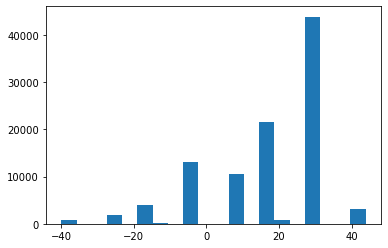

In [53]:
plt.hist(winDist,bins=20)

In [55]:
pd.DataFrame(winDist).describe()

,0
count,100000.000000
mean,16.406528
std,16.786063
min,-40.000000
25%,8.333333
50%,16.000000
75%,29.333333
max,43.878788


C:\Users\btcai\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


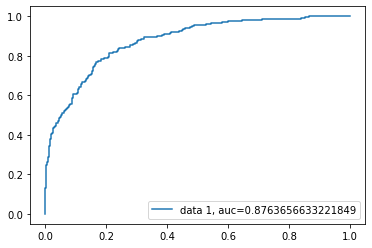

In [64]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
y_pred_proba = clf.predict_proba(test_x)[::,1]
fpr, tpr, _ = roc_curve(test_y,  y_pred_proba)
auc = roc_auc_score(test_y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()